<a href="https://colab.research.google.com/github/maya-espinosa/Cybersecurity-Breach-Analysis/blob/main/DTSC_4050_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

cs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DTSC 4050 Project/data_breaches.csv")
cs.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method
0,0,21st Century Oncology,2016,2200000,healthcare,hacked
1,1,500px,2020,14870304,social networking,hacked
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,4,Adobe Inc.,2019,7500000,tech,poor security


In [ ]:
sort_cs = cs.sort_values(by = "Method", ascending=True)
sort_cs

,Unnamed: 0,Entity,Year,Records,Organization type,Method
61,61,Central Intelligence Agency,2017,91,malware tools,Internal job
132,132,Unknown,2020,201000000,personal and demographic data about residents ...,Poor security
352,352,Virgin Media,2020,900000,mobile carrier,accidentally exposed
182,182,"LinkedIn, eHarmony, Last.fm",2012,8000000,web,accidentally published
285,285,Stratfor,2011,935000,military,accidentally published
...,...,...,...,...,...,...
169,169,Justdial,2019,100000000,local search,unprotected api
54,54,Capital One,2019,106000000,financial,unsecured S3 bucket
386,386,Chess.com,2023,800000,game,web scraping
99,99,Duolingo,2023,2676696,educational services,web scraping


In [ ]:
method_sort = sort_cs.value_counts("Method")
method_sort

Method
hacked                                                  210
poor security                                            49
lost / stolen media                                      33
accidentally published                                   21
inside job                                               20
lost / stolen computer                                   16
unknown                                                   7
web scraping                                              2
data leak due to security vulnerabilities                 2
poor security/inside job                                  2
ransomware hacked                                         2
improper setting, hacked                                  2
poor security / hacked                                    1
publicly accessible Amazon Web Services (AWS) server      1
Internal job                                              1
ransomware                                                1
misconfigured website            

<Axes: xlabel='Method'>

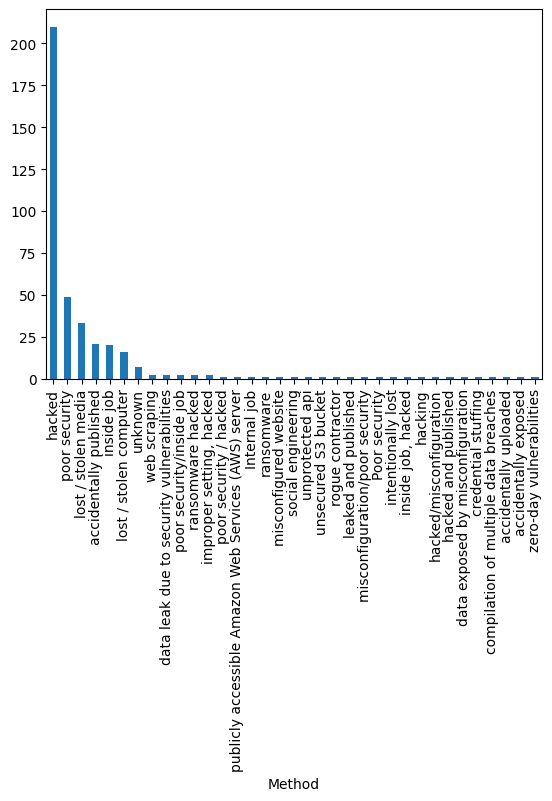

In [ ]:
method_sort.plot.bar()

<Axes: xlabel='Year'>

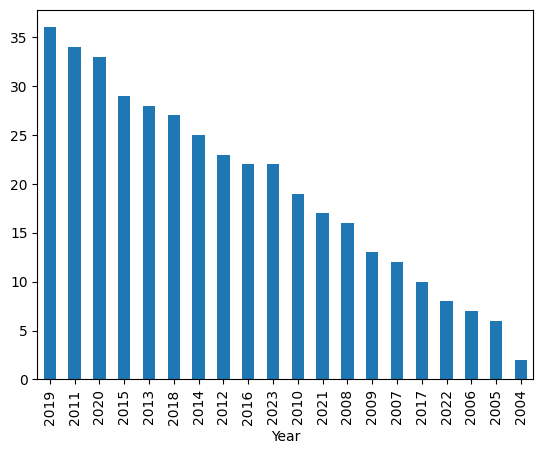

In [ ]:
year_sort = sort_cs.value_counts("Year")
year_sort.plot.bar()

<Axes: xlabel='Year', ylabel='Method'>

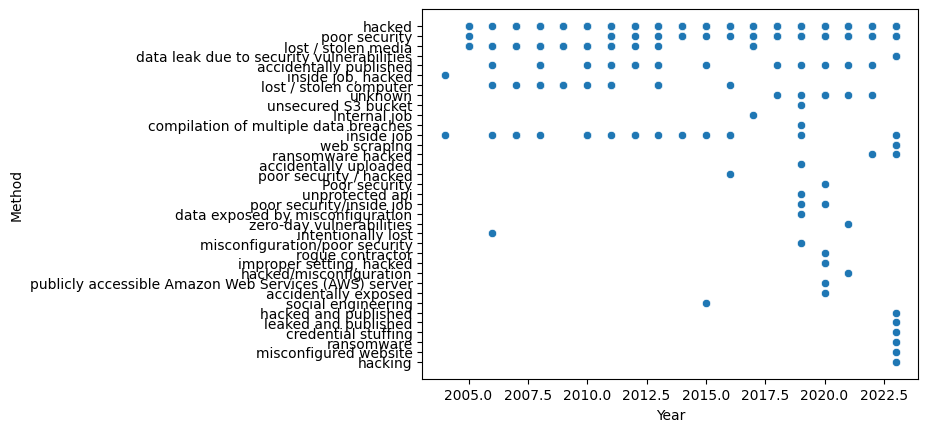

In [ ]:
import seaborn as sns

sns.scatterplot(data = cs, x = "Year", y = "Method")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load the dataset
cs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DTSC 4050 Project/data_breaches.csv")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cs['Method'], cs['Organization type'], test_size=0.2, random_state=42)

# Initialize TfidfVectorizer with different parameters
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Multinomial Naive Bayes classifier with different alpha values
alphas = [0.1, 0.5, 1.0, 2.0]
for alpha in alphas:
    classifier = MultinomialNB(alpha=alpha)

    # Train the classifier
    classifier.fit(X_train_tfidf, y_train)

    # Predict on the testing data
    y_pred = classifier.predict(X_test_tfidf)

    # Print classification report
    print(f"Classification Report (alpha={alpha}):")
    print(classification_report(y_test, y_pred))



Classification Report (alpha=0.1):
                                 precision    recall  f1-score   support

                       academic       0.00      0.00      0.00         2
computer services for charities       0.00      0.00      0.00         1
                    data broker       0.00      0.00      0.00         1
           educational services       0.00      0.00      0.00         1
                      financial       0.20      0.08      0.12        12
      financial service company       0.00      0.00      0.00         1
                         gaming       0.00      0.00      0.00         2
                     government       0.25      0.14      0.18         7
           government, database       0.00      0.00      0.00         1
                     healthcare       0.44      0.41      0.42        17
             healthcare, retail       0.00      0.00      0.00         1
                          hotel       0.00      0.00      0.00         1
               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'cs' is your DataFrame containing the data
# Splitting the data into features (X) and target variable (y)
X = cs[['Year', 'Organization type']]
y = cs['Records']

# Encoding categorical variables
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Metrics:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regression Metrics:")
print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)


Linear Regression Metrics:
Mean Absolute Error: 104128700.97851649
Mean Squared Error: 1.6403403694324624e+17
R-squared: 0.07357289083254637

Decision Tree Regression Metrics:
Mean Absolute Error: 97386977.93727107
Mean Squared Error: 1.5267940691359254e+17
R-squared: 0.137701270954518


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Metrics:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Random Forest Regression Metrics:
Mean Absolute Error: 102366828.43143433
Mean Squared Error: 1.6405606965686157e+17
R-squared: 0.07344845505347186


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regression model
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_regressor.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression Metrics:")
print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)

Gradient Boosting Regression Metrics:
Mean Absolute Error: 99994055.67825724
Mean Squared Error: 1.532500466960714e+17
R-squared: 0.13447842663568477


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Initialize base models
base_models = [
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Initialize meta-model
meta_model = LinearRegression()

# Initialize StackingRegressor
stacked_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit the model to the training data
stacked_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_stacked = stacked_regressor.predict(X_test)

# Evaluate the model
mae_stacked = mean_absolute_error(y_test, y_pred_stacked)
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
r2_stacked = r2_score(y_test, y_pred_stacked)

print("Stacked Regression Metrics:")
print("Mean Absolute Error:", mae_stacked)
print("Mean Squared Error:", mse_stacked)
print("R-squared:", r2_stacked)

Stacked Regression Metrics:
Mean Absolute Error: 117560725.09522827
Mean Squared Error: 1.7966708475240586e+17
R-squared: -0.014719024426036675


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


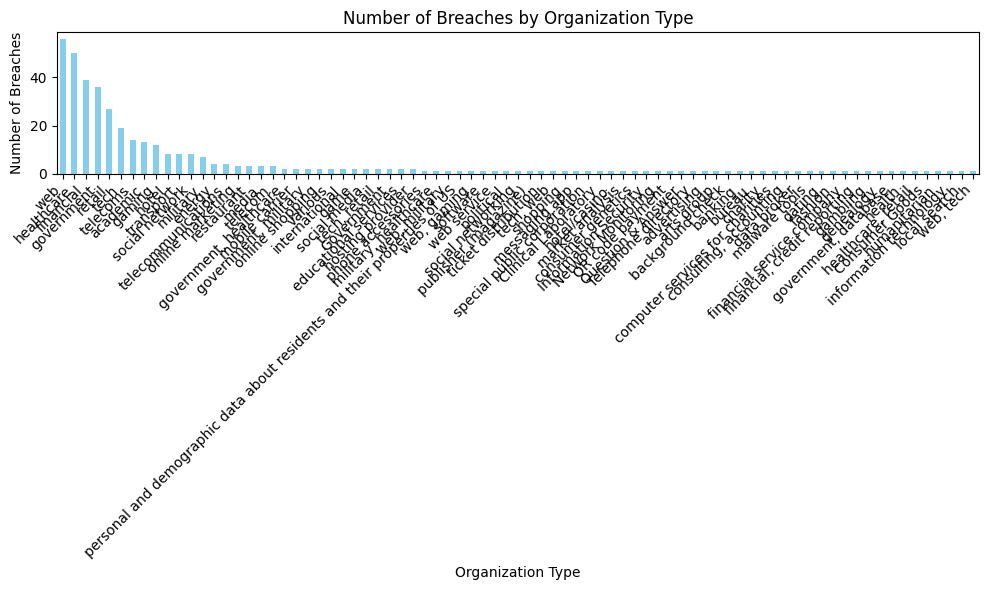

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
cs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DTSC 4050 Project/data_breaches.csv")

# Group by organization type and count the number of breaches
organization_attacks = cs.groupby('Organization type').size().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
organization_attacks.plot(kind='bar', color='skyblue')
plt.title('Number of Breaches by Organization Type')
plt.xlabel('Organization Type')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC

# Initialize Support Vector Classifier (SVM)
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Print classification report for SVM
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))


Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.10      0.86      0.18         7
        1000       0.00      0.00      0.00         1
       25000       0.00      0.00      0.00         1
       34000       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       56000       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         2
       80000       0.00      0.00      0.00         1
       91000       0.00      0.00      0.00         1
       97000       0.00      0.00      0.00         1
      100000       0.00      0.00      0.00         0
      114000       0.00      0.00      0.00         1
      125000       0.00      0.00      0.00         1
      130495       0.00      0.00      0.00         1
      156000       0.00      0.00      0.00         1
      200000       0.00      0.00      0.00         1
      300000       0.00      0.00      0.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize SVR model
svr_model = make_pipeline(StandardScaler(), SVR())

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression Metrics:")
print("Mean Absolute Error:", mae_svr)
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)

Support Vector Regression Metrics:
Mean Absolute Error: 107443716.84140527
Mean Squared Error: 1.884617020205549e+17
R-squared: -0.06438903196712054


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors Regression Metrics:")
print("Mean Absolute Error:", mae_knn)
print("Mean Squared Error:", mse_knn)
print("R-squared:", r2_knn)

K-Nearest Neighbors Regression Metrics:
Mean Absolute Error: 107484057.75384617
Mean Squared Error: 1.6818927630322086e+17
R-squared: 0.05010503952622258


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of K values to search
param_grid = {'n_neighbors': range(1, 21)}  # Adjust the range as needed

# Initialize KNN Regression model
knn_model = KNeighborsRegressor()

# Perform grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best K value
best_k = grid_search.best_params_['n_neighbors']

print("Best K:", best_k)

# Initialize KNN Regression model with the best K value
best_knn_model = KNeighborsRegressor(n_neighbors=best_k)

# Fit the model to the training data
best_knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best_knn = best_knn_model.predict(X_test)

# Evaluate the model
mae_best_knn = mean_absolute_error(y_test, y_pred_best_knn)
mse_best_knn = mean_squared_error(y_test, y_pred_best_knn)
r2_best_knn = r2_score(y_test, y_pred_best_knn)

print("K-Nearest Neighbors Regression with Best K Metrics:")
print("Mean Absolute Error:", mae_best_knn)
print("Mean Squared Error:", mse_best_knn)
print("R-squared:", r2_best_knn)

Best K: 11
K-Nearest Neighbors Regression with Best K Metrics:
Mean Absolute Error: 106422682.31818183
Mean Squared Error: 1.7123054072099242e+17
R-squared: 0.03292866652904547


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize MLPRegressor model
nn_model = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))

# Fit the model to the training data
nn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Regression Metrics:")
print("Mean Absolute Error:", mae_nn)
print("Mean Squared Error:", mse_nn)
print("R-squared:", r2_nn)

Neural Network Regression Metrics:
Mean Absolute Error: 107656022.38299951
Mean Squared Error: 1.8855652617529072e+17
R-squared: -0.06492457732824297


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
